In [2]:
import sys
import pickle
import importlib

sys.path.append('..')
#from utils import data_handler
from src.utils import data_handler

#### 0. BRCA

In [ ]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    LS_threshold= 0.0020,
    MAD_threshold = 1, 
    MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

with open('../workfiles/light_BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

In [ ]:
importlib.reload(data_handler)

data, metadata = data_handler.generate_dataset_BRCA(
    MAD_threshold = 1, MT_removal= True, expression_threshold= 0.1, keep_only_protein_coding = False, verbose = 1)

with open('../workfiles/BRCA_ds.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

### Generate all datasets necessary for experiments and pickle them

#### 1. Genomic datasets

not applying any filtering over phases
retaining all patient who have at least passed the Base Line Visit...
1521
loading samples...
loaded 1521 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1517 ambigously positioned symbols from the dataset
selecting genes based on expression threshold:  0.1 ...
min expression level 0.0
max expression level 1.0


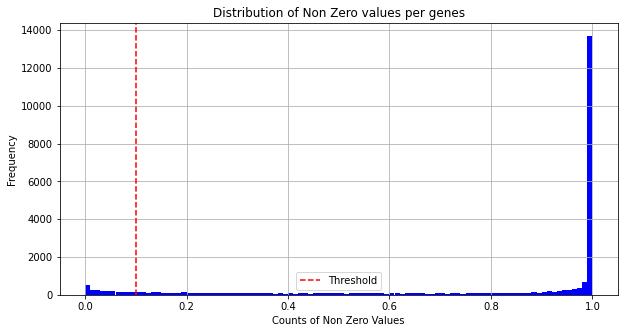

removing 9286 genes under the expression threshold from the dataset
selecting genes based on median absolute deviation window: [ 2 , 150 ] ...
min MAD 2.87169e-07
treshold: 2
max MAD 4327.33


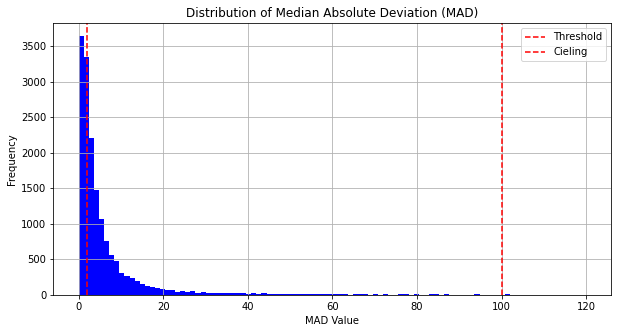

removing 6266 genes out of the MAD window from the dataset
selecting genes based on Laplacian Score (LS) threshold:  0.0027 ...
min LS 0.0021799740105638782
max LS 0.0206012689843833


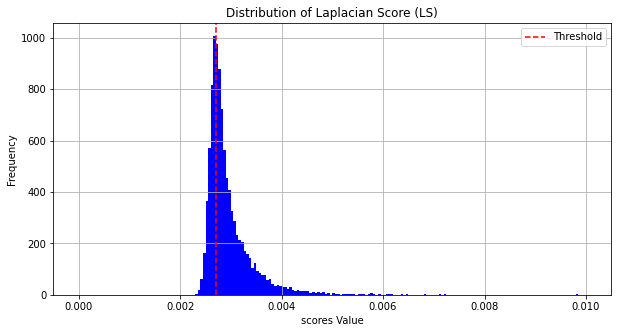

removing 3011 genes under the LS threshold from the dataset
number of genes selected :  6968
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 1521
keeping sample as is, no conversion to time series


In [3]:
data, metadata = data_handler.generate_dataset_genes(
    LS_threshold= 0.0027,
    MAD_threshold = 2,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    time_point="BL",
    verbose = 1,

    )


with open('../workfiles/PPMI_genes.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

gene selected with only MAD threshold of 2 : 11835

In [6]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_genes(
    time_point="BL",
    LS_threshold= 0.0025,
    MAD_threshold = 1,
    MT_removal= True, 
    expression_threshold= 0.1, 
    keep_only_symbols = True,
    drop_ambiguous_pos = True,
    sort_symbols = True,
    verbose = 0,
    only_pd=True
    )


with open('../workfiles/PPMI_genes_PD_only.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)

not applying any filtering over phases
retaining all patient who have at least passed the Base Line Visit...
1521
loading samples...
loaded 755 samples
retriving symbols for genes
removing 301 mithocondrial genes from the dataset
removing 7220 not found symbols from the dataset
removing 1514 ambigously positioned symbols from the dataset
selecting genes based on median absolute deviation window: [ 1 , 150 ] ...
removing 3139 genes out of the MAD window from the dataset
number of genes selected :  13096
sorting based on genomic position chr then transcript start...
log(1 + x) transformation...
scaling to [0, 1]...
number of seq in the dataset : 755
keeping sample as is, no conversion to time series


### 2. Trasnscriptomic dataset

In [ ]:
importlib.reload(data_handler)
data, metadata = data_handler.generate_dataset_transcripts(
    MAD_threshold = 1,
    #verbose = 1
    )

with open('../workfiles/PPMI_transcript.pkl', 'wb') as f:
    pickle.dump((data, metadata), f)